In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [44]:
def plot_grayscale_image(image, title=None): 
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

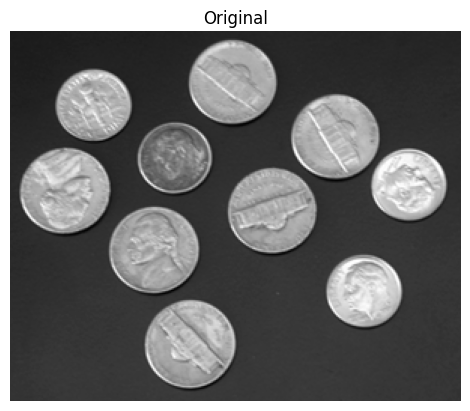

In [51]:
image_path = "../images/coins.png"
image = cv2.imread(image_path)
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_grayscale_image(imgray, 'Original')

### Counting coins

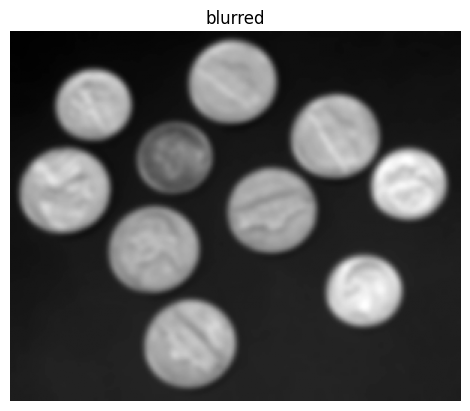

In [52]:
blurred = cv2.GaussianBlur(imgray, (11, 11), 0)
plot_grayscale_image(blurred, 'blurred')

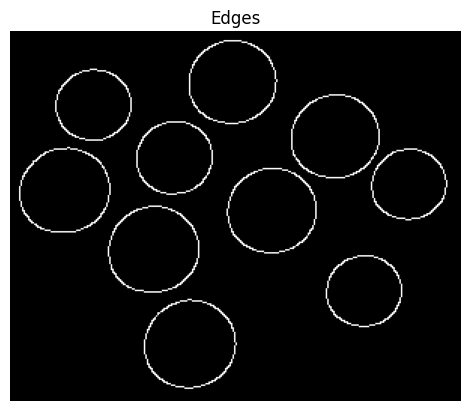

In [53]:
edged = cv2.Canny(blurred, 30, 150)
plot_grayscale_image(edged, 'Edges')

In [54]:
help(cv2.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @param c

In [59]:
contours, hierarchy = cv2.findContours(edged.copy(),  # src: edged image
                                       mode=cv2.RETR_EXTERNAL,  # mode: int -> Indicates type of contours we want (cv2.RETR_EXTERNAL to retrieve only the outermostcontours)
                                       method=cv2.CHAIN_APPROX_SIMPLE)  # method: int -> Algorithm to aproximate contours
# contours: list of arrays of the points for each contour
# hirearchy: array of structures (parent-child) -> [Next, Previous, First_Child, Parent] for each contour
print(f'I count {len(contours)} coins in this image. ')

I count 10 coins in this image. 


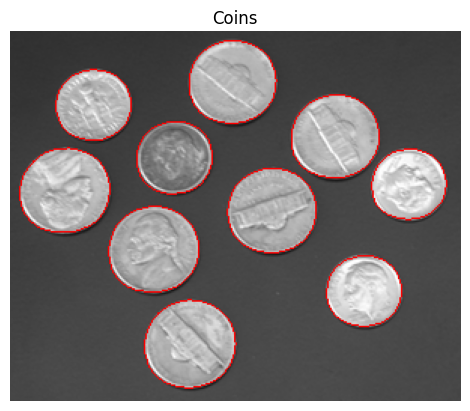

In [ ]:
coins = image.copy()
cv2.drawContours(coins,  # image: image where the contours are drawn (can be of any type). 
                 contours,  # contours: list of contours. 
                 -1,  # contourdId: index of the contour to be drawn.
                 color=(255, 0, 0), thickness=1)
plot_grayscale_image(coins, 'Coins')

Coin #1


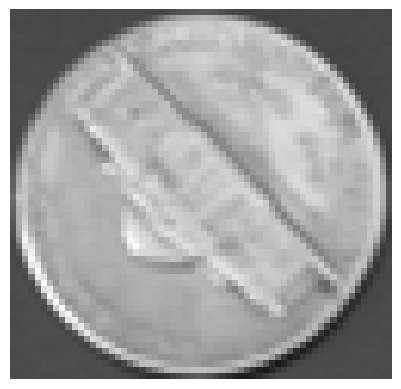

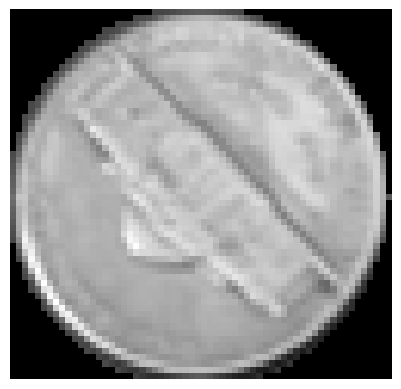

Coin #2


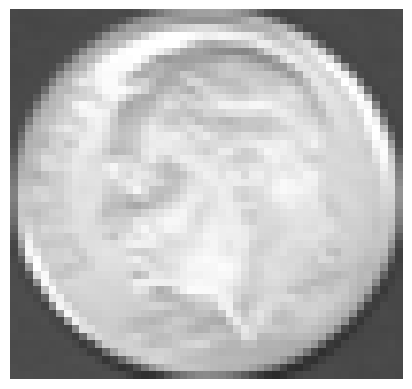

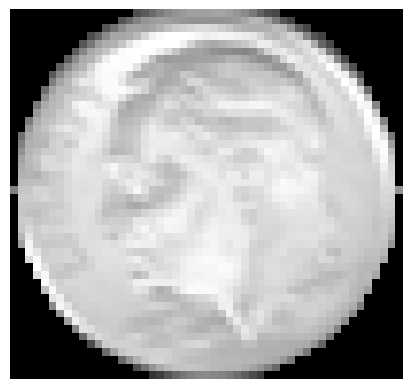

Coin #3


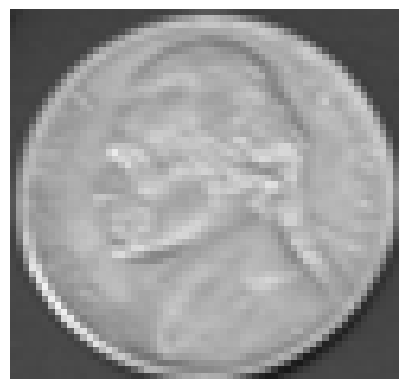

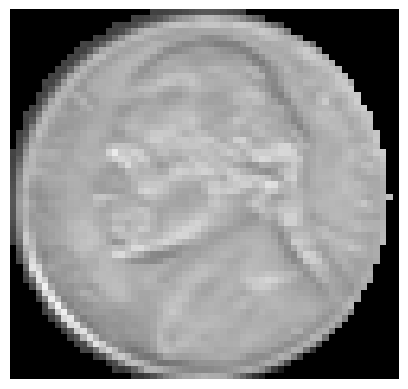

Coin #4


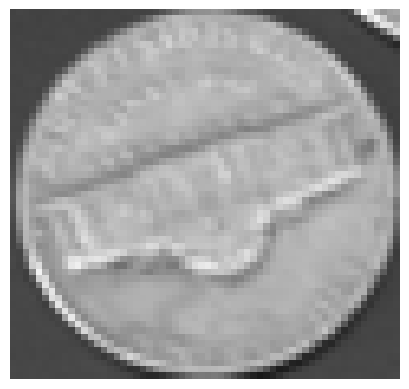

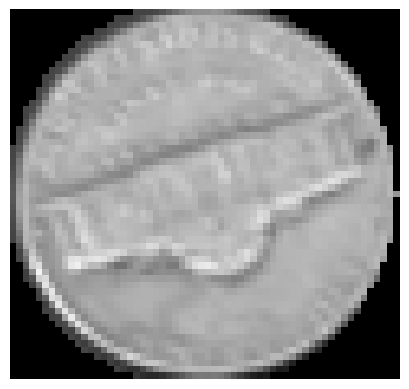

Coin #5


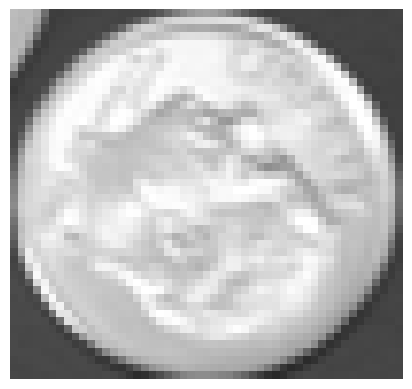

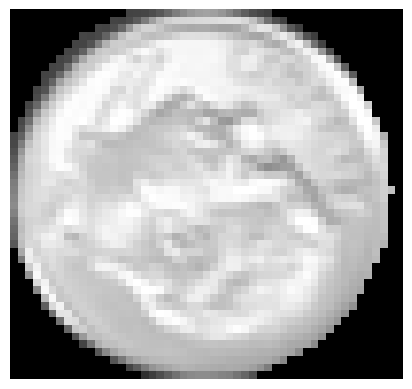

Coin #6


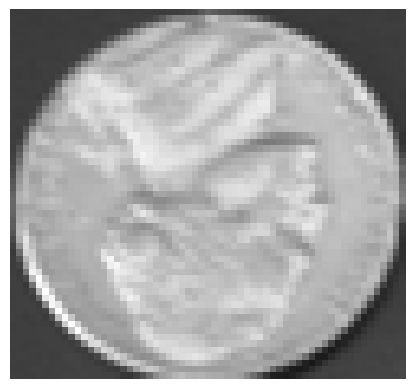

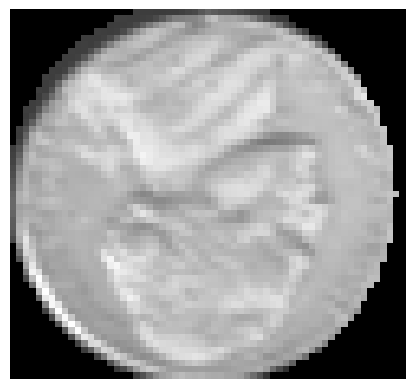

Coin #7


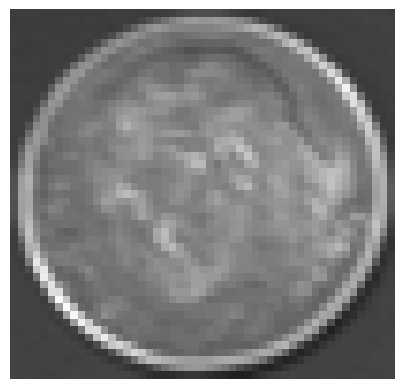

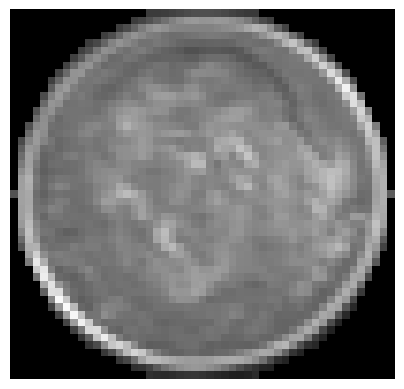

Coin #8


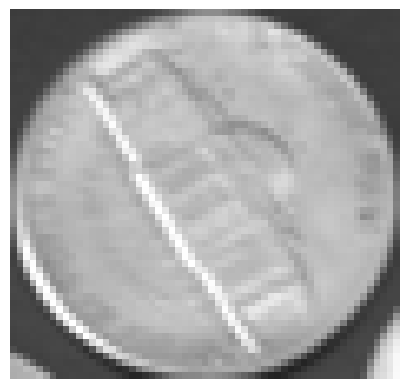

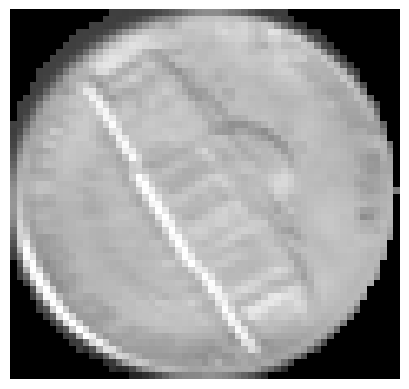

Coin #9


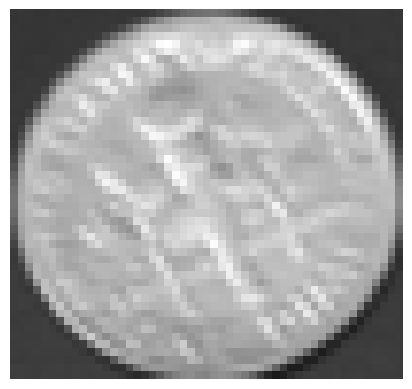

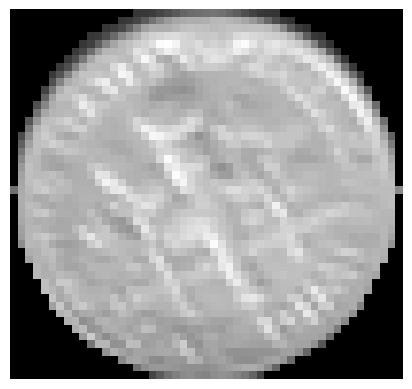

Coin #10


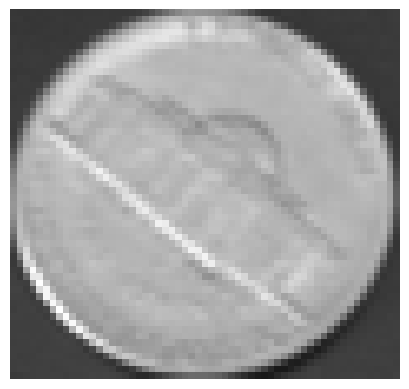

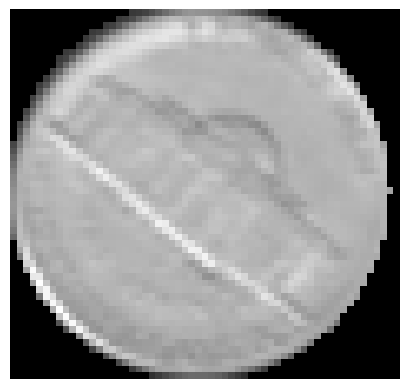

In [67]:
# Crop each image
for (i, c) in enumerate(contours): 
    x, y, w, h = cv2.boundingRect(c)
    print(f'Coin #{i + 1}')
    coin = image[y: y + h, x: x + w]
    plot_grayscale_image(coin)
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    cv2.imshow("Masked Coin", cv2.bitwise_and(coin, coin, mask =mask))
    plot_grayscale_image(cv2.bitwise_and(coin, coin, mask=mask))
